# EMアルゴリズムの実装

混合ガウス分布に従うデータを生成する．

In [25]:
import numpy as np
import matplotlib.pyplot as plt
x1 = np.random.normal(size=100)
x1 += np.array(5)
x2 = np.random.normal(size=199)
x2 += np.array(0)
x = np.hstack((x1, x2))

In [26]:
plt.hist(x)

(array([15., 32., 85., 53., 13.,  7., 26., 36., 23.,  9.]),
 array([-2.5299978 , -1.51647697, -0.50295613,  0.51056471,  1.52408554,
         2.53760638,  3.55112722,  4.56464805,  5.57816889,  6.59168973,
         7.60521056]),
 <a list of 10 Patch objects>)

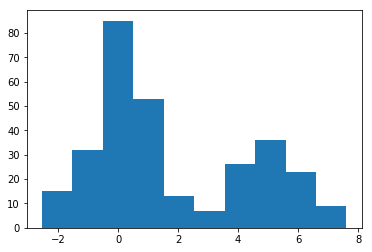

In [27]:
plt.show()

In [141]:
from scipy.stats import norm
class EMGMM:
    def __init__(self, x, cluster_num):
        self.x = x
        self.cluster_num = cluster_num
        self.pi = self._stricted_random(self.cluster_num)
        self.mu = np.random.uniform(self.x.min(), self.x.max(), self.cluster_num) # xの範囲からサンプリング
        self.sigma = np.random.uniform(0, self.x.var(), self.cluster_num) # xすべての分散より小さい値
        self.r = np.zeros((x.size, self.cluster_num)) # 負担率(i個のj次元ベクトル)
    
    def _stricted_random(self, n):
        vec = np.random.rand(n)
        _sum = vec.sum()
        vec /= _sum
        return vec
    
    def _e_step(self):
        for i in range(self.x.size):
            probs = np.zeros(self.cluster_num)
            for j in range(self.cluster_num):
                probs[j] = self.pi[j] * norm.pdf(x[i], self.mu[j], self.sigma[j])
            for j in range(self.cluster_num):
                self.r[i][j] = probs[j] / probs.sum()
    
    def _m_step(self):
        R = self.r.sum(axis=0)
        rx = np.copy(self.r)
        rxx = np.copy(self.r)
        for i in range(self.x.size):
            rx[i] = rx[i] * self.x[i]
        RX = rx.sum(axis=0)
        for j in range(self.cluster_num):
            self.pi[j] = R[j] / R.sum()
            self.mu[j] = RX[j] / R[j]
        
        rxx[i] = rxx[i] * ((x[i] - self.mu[j])**2)
        RXX = rxx.sum(axis=0)
        for j in range(self.cluster_num):
            self.sigma[j] = RXX[j] / R[j]
            

In [142]:
em = EMGMM(x, 3)

In [143]:
em._e_step()
em._m_step()

In [144]:
em.r

array([[1.28330224e-01, 6.86081135e-02, 8.03061662e-01],
       [2.39426717e-01, 2.05017590e-01, 5.55555693e-01],
       [1.72064959e-01, 1.21054922e-01, 7.06880119e-01],
       [1.36111176e-01, 7.79566963e-02, 7.85932128e-01],
       [1.53947042e-01, 9.92551020e-02, 7.46797856e-01],
       [1.44161884e-01, 8.75690855e-02, 7.68269031e-01],
       [1.08487840e-01, 4.31097807e-02, 8.48402379e-01],
       [3.14253648e-01, 3.03011131e-01, 3.82735221e-01],
       [3.48067284e-01, 3.48028336e-01, 3.03904379e-01],
       [3.74266741e-01, 3.82537738e-01, 2.43195521e-01],
       [2.19842147e-01, 1.80120681e-01, 6.00037172e-01],
       [1.18985425e-01, 5.71311890e-02, 8.23883387e-01],
       [2.40552267e-01, 2.06459714e-01, 5.52988019e-01],
       [1.76031105e-01, 1.25866693e-01, 6.98102202e-01],
       [1.51559412e-01, 9.64002073e-02, 7.52040381e-01],
       [1.73248802e-01, 1.22489535e-01, 7.04261663e-01],
       [1.13227445e-01, 4.97137076e-02, 8.37058848e-01],
       [1.01577642e-01, 2.74172

In [145]:
em._e_step()
em._m_step()

In [146]:
em.r

array([[1.24316273e-05, 4.97911698e-05, 9.99937777e-01],
       [5.59944449e-03, 1.22250293e-02, 9.82175526e-01],
       [2.73382150e-04, 7.96718577e-04, 9.98929899e-01],
       [2.50039861e-05, 9.29972683e-05, 9.99881999e-01],
       [9.27408173e-05, 3.01230454e-04, 9.99606029e-01],
       [4.70307561e-05, 1.63774116e-04, 9.99789195e-01],
       [8.93089108e-07, 4.78510049e-06, 9.99994322e-01],
       [7.17024364e-02, 1.22842603e-01, 8.05454961e-01],
       [1.74024785e-01, 2.68442764e-01, 5.57532451e-01],
       [2.82267133e-01, 4.00001319e-01, 3.17731548e-01],
       [2.57561541e-03, 6.04663461e-03, 9.91377750e-01],
       [4.49993452e-06, 2.01194929e-05, 9.99975381e-01],
       [5.84528896e-03, 1.27108949e-02, 9.81443816e-01],
       [3.38620364e-04, 9.66214778e-04, 9.98695165e-01],
       [7.91697157e-05, 2.61328204e-04, 9.99659502e-01],
       [2.91624998e-04, 8.44471999e-04, 9.98863903e-01],
       [2.04482266e-06, 9.97704209e-06, 9.99987978e-01],
       [5.28435865e-08, 3.95523

In [90]:
np.random.normal(5, 10)

13.093577853705199

In [106]:
norm.pdf(-1, 10, 10)

0.021785217703255054